In [2]:
pip install xesmf

  Obtaining dependency information for xesmf from https://files.pythonhosted.org/packages/ce/c6/e0ecd645ee8a47fd58d15929d7760fefb45b3399c3c228670aa05349b5d8/xesmf-0.8.8-py3-none-any.whl.metadata
  Obtaining dependency information for cf-xarray>=0.5.1 from https://files.pythonhosted.org/packages/1b/2c/7ba6a2a7ad421075ec3bd33ff4b5067763816687d2da95ea0751eee9621f/cf_xarray-0.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.55.2 from https://files.pythonhosted.org/packages/9a/51/a4dc2c01ce7a850b8e56ff6d5381d047a5daea83d12bad08aa071d34b2ee/numba-0.60.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/37/63/e182e43081fffa0a2d970c480f2ef91647a6ab94098f61748c23c2a485f2/shapely-2.0.6-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for sparse>=0.8.0 from https://files.pythonhosted.org/packages/4f/37/fcb96b950a972dac48e0fc9e3c528130ca8d8d1e0f09e727df3c6

In [1]:
pip install git+https://github.com/esmf-org/esmf.git


  Cloning https://github.com/esmf-org/esmf.git to /private/var/folders/bv/rfp6znxd6qqbmjm5bhtmkw4m0000gn/T/pip-req-build-35jew099
  Running command git clone --filter=blob:none --quiet https://github.com/esmf-org/esmf.git /private/var/folders/bv/rfp6znxd6qqbmjm5bhtmkw4m0000gn/T/pip-req-build-35jew099
  Resolved https://github.com/esmf-org/esmf.git to commit 84b8fec34e85a3265c163cd09c54927eac1b32ef
ERROR: git+https://github.com/esmf-org/esmf.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: /Users/wangy/Documents/MACS/Thesis/thesis_code/thesis_featurevisual/venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib as plt
import pandas as pd
#import sklearn
import ESMF
import xarray as xr
import xesmf as xe

ModuleNotFoundError: No module named 'ESMF'

In [1]:
!pip show netCDF4

Name: netCDF4
Version: 1.6.4
Summary: Provides an object-oriented python interface to the netCDF version 4 library
Home-page: 
Author: 
Author-email: Jeff Whitaker <jeffrey.s.whitaker@noaa.gov>
License: MIT
Location: /apps/brussel/RL8/zen4/software/netcdf4-python/1.6.4-foss-2023a/lib/python3.11/site-packages
Requires: certifi, cftime, numpy
Required-by: 


In [ ]:
import os

def list_files_and_folders_in_directory(path=None):
    """
    List all files and folders in the specified directory.
    If no path is provided, it lists files and folders in the current working directory.
    """
    # Use the provided path or default to the current working directory
    directory = path if path else os.getcwd()
    
    try:
        # Get all items in the directory
        items = os.listdir(directory)
        
        print(f"\nDirectory: {directory}\n")
        
        # Separate files and folders
        files = [f for f in items if os.path.isfile(os.path.join(directory, f))]
        folders = [f for f in items if os.path.isdir(os.path.join(directory, f))]
        
        # Print folders
        if folders:
            print("Folders:")
            for folder in folders:
                print(f"  📁 {folder}")
        else:
            print("No folders found.")

        # Print files
        if files:
            print("\nFiles:")
            for file in files:
                print(f"  📄 {file}")
        else:
            print("No files found.")
            
    except FileNotFoundError:
        print(f"Error: The directory '{directory}' does not exist.")
    except PermissionError:
        print(f"Error: Permission denied to access '{directory}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
list_files_and_folders_in_directory("/vscmnt/brussel_pixiu_data/_data_brussel/vo/000/bvo00029/UrbClim_Emulator/Urbclim_data/Urbclim_non_projected")


In [28]:
ds = xr.open_dataset('/vscmnt/brussel_pixiu_data/_data_brussel/vo/000/bvo00029/UrbClim_Emulator/Features/Meteo/ERA_altitude/geopot_Brussels_UrbClim_2015_01_v1.0.nc',engine = 'netcdf4')

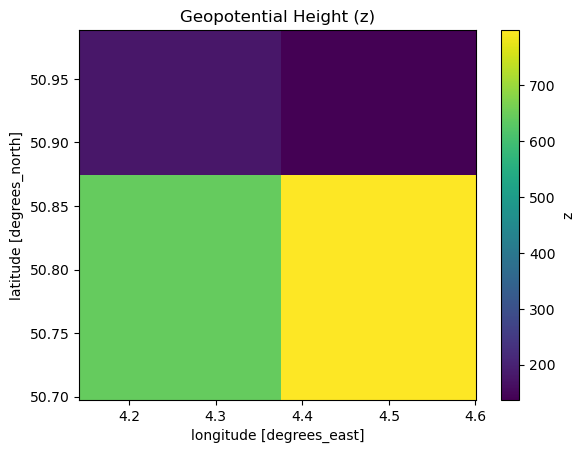

<xarray.Dataset>
Dimensions:      (y: 253, x: 399)
Coordinates:
    spatial_ref  int64 ...
  * y            (y) float64 50.99 50.99 50.99 50.98 ... 50.7 50.7 50.7 50.7
  * x            (x) float64 4.143 4.144 4.145 4.146 ... 4.597 4.598 4.599 4.6
Data variables:
    z            (y, x) float32 ...


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the z variable as a 2D map
ds['z'].plot(cmap='viridis')

# Add a title
plt.title('Geopotential Height (z)')
plt.show()

geo_df = ds


print(geo_df)

In [17]:
lon_range = (ds['x'] >= 3.9) & (ds['x'] <= 4.6)
lat_range = (ds['y'] >= 50.4) & (ds['y'] <= 51.1)
print(lon_range, lat_range)

<xarray.DataArray 'x' (x: 399)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  T

In [30]:
# Load the dataset
ds2 = xr.open_dataset('/vscmnt/brussel_pixiu_data/_data_brussel/vo/000/bvo00029/UrbClim_Emulator/Features/Meteo/ERA/ERA5_2015_07.nc')

# Define the latitude and longitude range
lon_min, lon_max = 4.0, 4.5
lat_min, lat_max = 50.5, 51.0

# Select the variable and slice the region based on lat/lon ranges
var_region = ds2['t2m'].sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_max, lat_min))

# Print the resulting DataArray
print(var_region)


<xarray.DataArray 't2m' (time: 744, latitude: 3, longitude: 3)>
[6696 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 4.0 4.25 4.5
  * latitude   (latitude) float32 51.0 50.75 50.5
  * time       (time) datetime64[ns] 2015-07-01 ... 2015-07-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature


In [31]:
import xarray as xr

# Define the transform function using xarray
def transform(urbclim_cor):
    # Convert temperature from Kelvin to Celsius directly in the DataArray
    urbclim_cor['tas'] = urbclim_cor['tas'] - 273.15

    # Ensure time is in datetime format
    urbclim_cor['time'] = xr.decode_cf(urbclim_cor)['time']

    return urbclim_cor

# Open the dataset
urbclim_cor = xr.open_dataset('/vscmnt/brussel_pixiu_data/_data_brussel/vo/000/bvo00029/UrbClim_Emulator/Urbclim_data/Urbclim_non_projected/tas_Brussels_UrbClim_2015_07_v1.0.nc')

# Select a specific time step
urbclim_cor = urbclim_cor.sel(time="2015-07-01T00:00:00")

print(urbclim_cor)
# Apply the transformation
urbclim_cor_tas = transform(urbclim_cor)

# Extract and print the coordinates
urbclim_coor = urbclim_cor_tas[['y', 'x']].coords
print(urbclim_coor)


<xarray.Dataset>
Dimensions:    (x: 301, y: 301)
Coordinates:
  * x          (x) float32 3.91e+06 3.91e+06 3.91e+06 ... 3.94e+06 3.94e+06
  * y          (y) float32 3.082e+06 3.082e+06 3.082e+06 ... 3.111e+06 3.112e+06
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
    time       datetime64[ns] 2015-07-01
Data variables:
    tas        (y, x) float32 ...
Attributes:
    conventions:    CF-1.6
    title:          Urban climate modelled with UrbClim
    references:     doi.org/10.1016/j.uclim.2015.01.001 
    source:         UrbClim simulations
    institution:    VITO (www.vito.be)
    contact:        bd_rma@vito.be
    project:        Copernicus Climate Change Service (C3S) Sectoral Informat...
    creation_date:  Sun May 19 06:30:54 2019
    comment:        Simulation of a city by UrbClim model
Coordinates:
  * y          (y) float32 3.082e+06 3.082e+06 3.082e+06 ... 3.111e+06 3.112e+06
  * x          (x) float32 3.91e+06 3.91e+06 3.91e+06 ... 3.94e+06 3.94e+06
  

In [37]:
import xesmf as xe

def interpolate(source_ds, target_ds, feature_name):
    """
    Interpolate `feature_name` from the source dataset to the target dataset using xESMF.
    """
    # 1. Rename dimensions and coordinates to match xESMF expectations
    source_ds = source_ds.rename({'x': 'lon', 'y': 'lat'})
    target_ds = target_ds.rename({'x': 'lon', 'y': 'lat'})

    # 2. Flatten latitude and longitude coordinates in the target dataset
    target_ds = target_ds.assign_coords(
        lon=target_ds['longitude'].isel(lat=0),
        lat=target_ds['latitude'].isel(lon=0),
    )

    # 3. Create an xESMF regridder
    regridder = xe.Regridder(source_ds, target_ds, method="nearest_s2d", reuse_weights=False)

    # 4. Apply the regridder to interpolate the feature
    interpolated_feature = regridder(source_ds[feature_name])

    # 5. Add the interpolated feature to the target dataset
    target_ds[feature_name] = interpolated_feature

    return target_ds

# Convert `urbclim_coor` to a full Dataset
#urbclim_coor = urbclim_coor.to_dataset()

# Run the interpolation
geo_df_new_cor = interpolate(geo_df, urbclim_coor, 'z')
print(geo_df_new_cor)


<xarray.Dataset>
Dimensions:      (lat: 301, lon: 301)
Coordinates:
    latitude     (lat, lon) float32 ...
    longitude    (lat, lon) float32 ...
    time         datetime64[ns] 2015-07-01
  * lat          (lat) float32 50.7 50.7 50.7 50.7 ... 50.96 50.97 50.97 50.97
  * lon          (lon) float32 4.177 4.178 4.18 4.181 ... 4.596 4.598 4.599 4.6
    spatial_ref  int64 0
Data variables:
    z            (lat, lon) float32 642.8 642.8 642.8 ... 137.3 137.3 137.3
Attributes:
    conventions:    CF-1.6
    title:          Urban climate modelled with UrbClim
    references:     doi.org/10.1016/j.uclim.2015.01.001 
    source:         UrbClim simulations
    institution:    VITO (www.vito.be)
    contact:        bd_rma@vito.be
    project:        Copernicus Climate Change Service (C3S) Sectoral Informat...
    creation_date:  Sun May 19 06:30:54 2019
    comment:        Simulation of a city by UrbClim model


In [38]:
print(geo_df)
print(geo_df.coords)
print(urbclim_coor)



<xarray.Dataset>
Dimensions:      (y: 253, x: 399)
Coordinates:
    spatial_ref  int64 0
  * y            (y) float64 50.99 50.99 50.99 50.98 ... 50.7 50.7 50.7 50.7
  * x            (x) float64 4.143 4.144 4.145 4.146 ... 4.597 4.598 4.599 4.6
Data variables:
    z            (y, x) float32 ...
Coordinates:
    spatial_ref  int64 0
  * y            (y) float64 50.99 50.99 50.99 50.98 ... 50.7 50.7 50.7 50.7
  * x            (x) float64 4.143 4.144 4.145 4.146 ... 4.597 4.598 4.599 4.6
<xarray.Dataset>
Dimensions:    (y: 301, x: 301)
Coordinates:
  * y          (y) float32 3.082e+06 3.082e+06 3.082e+06 ... 3.111e+06 3.112e+06
  * x          (x) float32 3.91e+06 3.91e+06 3.91e+06 ... 3.94e+06 3.94e+06
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
    time       datetime64[ns] 2015-07-01
Data variables:
    *empty*
Attributes:
    conventions:    CF-1.6
    title:          Urban climate modelled with UrbClim
    references:     doi.org/10.1016/j.uclim.2015.01.001 
 

In [39]:
# Check the dimensions of the target dataset
print(urbclim_coor.dims)

# Check the dimensions of the interpolated dataset
print(geo_df_new_cor.dims)

# Check the coordinates of the interpolated dataset
print(geo_df_new_cor.coords)


Frozen({'y': 301, 'x': 301})
Frozen({'lat': 301, 'lon': 301})
Coordinates:
    latitude     (lat, lon) float32 ...
    longitude    (lat, lon) float32 ...
    time         datetime64[ns] 2015-07-01
  * lat          (lat) float32 50.7 50.7 50.7 50.7 ... 50.96 50.97 50.97 50.97
  * lon          (lon) float32 4.177 4.178 4.18 4.181 ... 4.596 4.598 4.599 4.6
    spatial_ref  int64 0


In [45]:
print(geo_df.coords)
print(geo_df.dims)

Coordinates:
    spatial_ref  int64 0
  * y            (y) float64 50.99 50.99 50.99 50.98 ... 50.7 50.7 50.7 50.7
  * x            (x) float64 4.143 4.144 4.145 4.146 ... 4.597 4.598 4.599 4.6
Frozen({'y': 253, 'x': 399})


In [46]:
# Print latitude values
print(urbclim_coor['latitude'].values)

# Print longitude values
print(urbclim_coor['longitude'].values)


[[50.698475 50.698547 50.698616 ... 50.718998 50.719063 50.71913 ]
 [50.69937  50.69944  50.699512 ... 50.719894 50.71996  50.720024]
 [50.700268 50.700336 50.70041  ... 50.72079  50.720856 50.72092 ]
 ...
 [50.965378 50.965446 50.96552  ... 50.986034 50.9861   50.986168]
 [50.96627  50.966343 50.966415 ... 50.98693  50.986996 50.987064]
 [50.967167 50.96724  50.96731  ... 50.987827 50.987892 50.98796 ]]
[[4.1767464 4.1781583 4.1795697 ... 4.597578  4.598991  4.6004033]
 [4.176635  4.178046  4.179458  ... 4.597474  4.598887  4.6003   ]
 [4.176523  4.1779346 4.1793466 ... 4.5973706 4.5987835 4.6001964]
 ...
 [4.143234  4.1446533 4.146073  ... 4.5664635 4.5678844 4.569305 ]
 [4.1431203 4.14454   4.14596   ... 4.566358  4.567779  4.5692   ]
 [4.1430073 4.144427  4.1458464 ... 4.566253  4.567674  4.5690947]]


In [41]:
# Check the original values in geo_df
print(len(geo_df['z'].values))

# Check the interpolated values in geo_df_new_cor
print(len(geo_df_new_cor['z'].values))


253
301


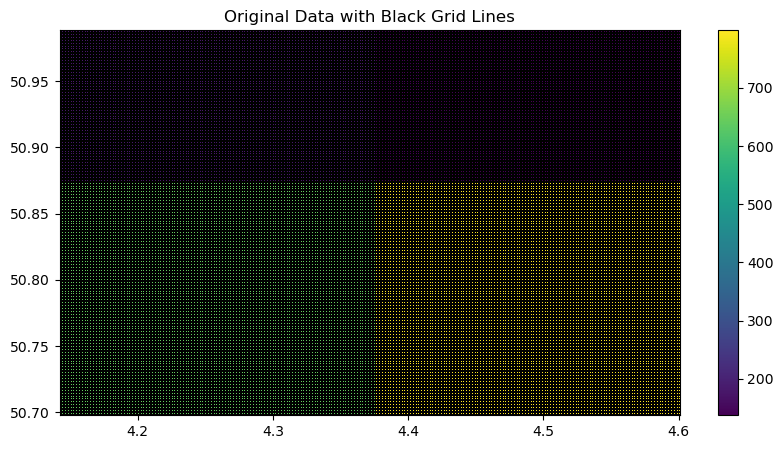

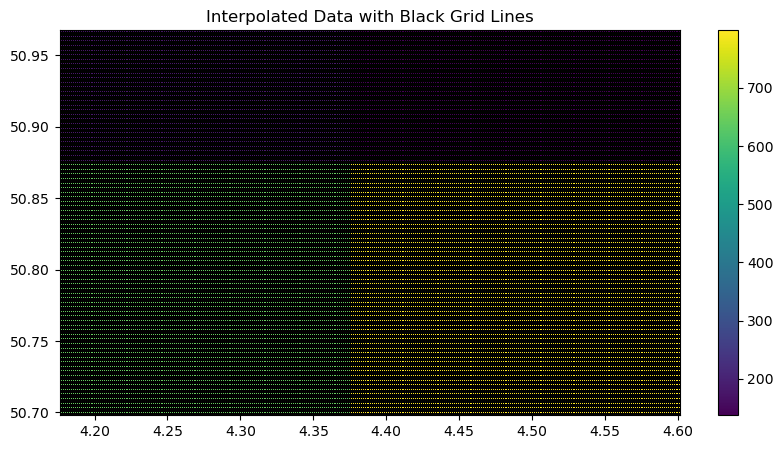

In [44]:
import matplotlib.pyplot as plt

# Plot the original data using pcolormesh with black lines
plt.figure(figsize=(10, 5))
plt.pcolormesh(geo_df['x'], geo_df['y'], geo_df['z'], cmap='viridis', edgecolors='black', linewidth=0.5)
plt.title('Original Data with Black Grid Lines')
plt.colorbar()
plt.show()

# Plot the interpolated data using pcolormesh with black lines
plt.figure(figsize=(10, 5))
plt.pcolormesh(geo_df_new_cor['lon'], geo_df_new_cor['lat'], geo_df_new_cor['z'], cmap='viridis', edgecolors='black', linewidth=0.5)
plt.title('Interpolated Data with Black Grid Lines')
plt.colorbar()
plt.show()
